In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from census import Census
from us import states

import config

In [35]:
# Set API key
c = Census(config.key)

In [36]:
# Obtain Census variables from the 2014 ACS at the tract level for the Commonwealth of Illinois (FIPS code: 17)
# B15003_001E: educational attainment by the population 25 years and older (total)
# B15003_002E: educational attainment by the population 25 years and older (none)
# B15003_003E: educational attainment by the population 25 years and older (nursery school)
# B15003_004E: educational attainment by the population 25 years and older (kindergarten)
# B15003_005E: educational attainment by the population 25 years and older (1st grade)
# B15003_006E: educational attainment by the population 25 years and older (2nd grade)
# B15003_007E: educational attainment by the population 25 years and older (3rd grade)
# B15003_008E: educational attainment by the population 25 years and older (4th grade)
# B15003_009E: educational attainment by the population 25 years and older (5th grade)
# B15003_010E: educational attainment by the population 25 years and older (6th grade)
# B15003_011E: educational attainment by the population 25 years and older (7th grade)
# B15003_012E: educational attainment by the population 25 years and older (8th grade)
# B15003_013E: educational attainment by the population 25 years and older (9th Grade)
# B15003_014E: educational attainment by the population 25 years and older (10th grade)
# B15003_015E: educational attainment by the population 25 years and older (11th grade)
# B15003_016E: educational attainment by the population 25 years and older (12th grade no diploma)
# B15003_017E: educational attainment by the population 25 years and older (highschool diploma)
# B15003_018E: educational attainment by the population 25 years and older (GED or alternative)
# B15003_019E: educational attainment by the population 25 years and older (<1 year college)
# B15003_020E: educational attainment by the population 25 years and older (>1 year college)
# B15003_021E: educational attainment by the population 25 years and older (associates degree)
# B15003_022E: educational attainment by the population 25 years and older (bachelors degree)
# B15003_023E: educational attainment by the population 25 years and older (masters degree)
# B15003_024E: educational attainment by the population 25 years and older (professional school degree)
# B15003_025E: educational attainment by the population 25 years and older (doctorate degree)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2014/acs/acs5/variables.html; https://pypi.org/project/census/
il_census = c.acs5.state_county_tract(fields = ('NAME', 'B15003_001E', 'B15003_002E', 'B15003_003E', 'B15003_004E', 'B15003_005E', 'B15003_006E', 'B15003_007E', 'B15003_008E', 'B15003_009E', 'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E', 'B15003_014E', 'B15003_015E', 'B15003_016E', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E','B01003_001E'),
                                      state_fips = states.IL.fips,
                                      county_fips = "031", # Cook County
                                      tract = "*",
                                      year = 2014)

In [37]:
# Create a dataframe from the census data
il_df = pd.DataFrame(il_census)

# Show the dataframe
print(il_df.head(2))
print('Shape: ', il_df.shape)

                                          NAME  B15003_001E  B15003_002E  \
0     Census Tract 2407, Cook County, Illinois       1047.0         36.0   
1  Census Tract 8221.02, Cook County, Illinois       3639.0         55.0   

   B15003_003E  B15003_004E  B15003_005E  B15003_006E  B15003_007E  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0         39.0          1.0         47.0   

   B15003_008E  B15003_009E  ...  B15003_020E  B15003_021E  B15003_022E  \
0          4.0         10.0  ...        119.0         36.0        340.0   
1          0.0         51.0  ...        534.0        185.0        356.0   

   B15003_023E  B15003_024E  B15003_025E  B01003_001E  state  county   tract  
0        140.0         20.0         32.0       1427.0     17     031  240700  
1        296.0         51.0         44.0       4752.0     17     031  822102  

[2 rows x 30 columns]
Shape:  (1319, 30)


In [38]:
# Access shapefile of Illinois census tracts
il_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2014/TRACT/tl_2014_17_tract.zip")

# Reproject shapefile to UTM Zone 16N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-16n/
il_tract = il_tract.to_crs(epsg = 32616)

# Print GeoDataFrame of shapefile
print(il_tract.head(2))
print('Shape: ', il_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(il_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID NAME          NAMELSAD  MTFCC  \
0      17      161  022800  17161022800  228  Census Tract 228  G5020   
1      17      161  022900  17161022900  229  Census Tract 229  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2097335       0  +41.4990973  -090.5473216   
1        S  1311567       0  +41.4897868  -090.5477824   

                                            geometry  
0  POLYGON ((203053.165 4599746.440, 203054.056 4...  
1  POLYGON ((203043.102 4599640.181, 203046.622 4...  
Shape:  (3123, 13)

The shapefile projection is: epsg:32616


In [39]:
# Combine state, county, and tract columns together to create a new string and assign to new column
il_df["GEOID"] = il_df["state"] + il_df["county"] + il_df["tract"]

In [40]:
# Print head of dataframe
il_df.head()

,NAME,B15003_001E,B15003_002E,B15003_003E,B15003_004E,B15003_005E,B15003_006E,B15003_007E,B15003_008E,B15003_009E,...,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B01003_001E,state,county,tract,GEOID
0,"Census Tract 2407, Cook County, Illinois",1047.0,36.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,...,36.0,340.0,140.0,20.0,32.0,1427.0,17,031,240700,17031240700
1,"Census Tract 8221.02, Cook County, Illinois",3639.0,55.0,0.0,0.0,39.0,1.0,47.0,0.0,51.0,...,185.0,356.0,296.0,51.0,44.0,4752.0,17,031,822102,17031822102
2,"Census Tract 2226, Cook County, Illinois",1050.0,17.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,63.0,250.0,78.0,8.0,14.0,1554.0,17,031,222600,17031222600
3,"Census Tract 2308, Cook County, Illinois",822.0,35.0,0.0,0.0,10.0,0.0,2.0,3.0,8.0,...,64.0,165.0,14.0,7.0,0.0,1195.0,17,031,230800,17031230800
4,"Census Tract 202, Cook County, Illinois",4166.0,125.0,0.0,0.0,0.0,30.0,30.0,0.0,22.0,...,160.0,1414.0,540.0,100.0,39.0,6255.0,17,031,020200,17031020200


In [41]:
# Remove columns
il_df = il_df.drop(columns = ["state", "county", "tract"])

# Show updated dataframe
il_df.head(2)

,NAME,B15003_001E,B15003_002E,B15003_003E,B15003_004E,B15003_005E,B15003_006E,B15003_007E,B15003_008E,B15003_009E,...,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B01003_001E,GEOID
0,"Census Tract 2407, Cook County, Illinois",1047.0,36.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,...,0.0,24.0,119.0,36.0,340.0,140.0,20.0,32.0,1427.0,17031240700
1,"Census Tract 8221.02, Cook County, Illinois",3639.0,55.0,0.0,0.0,39.0,1.0,47.0,0.0,51.0,...,198.0,200.0,534.0,185.0,356.0,296.0,51.0,44.0,4752.0,17031822102


In [42]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(il_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(il_tract.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
B15003_001E    float64
B15003_002E    float64
B15003_003E    float64
B15003_004E    float64
B15003_005E    float64
B15003_006E    float64
B15003_007E    float64
B15003_008E    float64
B15003_009E    float64
B15003_010E    float64
B15003_011E    float64
B15003_012E    float64
B15003_013E    float64
B15003_014E    float64
B15003_015E    float64
B15003_016E    float64
B15003_017E    float64
B15003_018E    float64
B15003_019E    float64
B15003_020E    float64
B15003_021E    float64
B15003_022E    float64
B15003_023E    float64
B15003_024E    float64
B15003_025E    float64
B01003_001E    float64
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    ge

In [43]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
il_merge = il_tract.merge(il_df, on = "GEOID")

# Show result
print(il_merge.head(2))
print('Shape: ', il_merge.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  NAME_x             NAMELSAD  MTFCC  \
0      17      031  030101  17031030101  301.01  Census Tract 301.01  G5020   
1      17      031  030701  17031030701  307.01  Census Tract 307.01  G5020   

  FUNCSTAT   ALAND  AWATER  ... B15003_017E B15003_018E B15003_019E  \
0        S  122359  115695  ...       267.0        46.0        36.0   
1        S   69878       0  ...       157.0        15.0        82.0   

  B15003_020E  B15003_021E  B15003_022E  B15003_023E  B15003_024E  \
0       586.0        149.0       1081.0        551.0         67.0   
1       185.0        144.0        408.0        196.0         65.0   

   B15003_025E  B01003_001E  
0         72.0       3727.0  
1         13.0       1734.0  

[2 rows x 40 columns]
Shape:  (1319, 40)


In [44]:
# Create new dataframe from select columns
il_education_tract = il_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", 'B15003_001E', 'B15003_002E', 'B15003_003E', 'B15003_004E', 'B15003_005E', 'B15003_006E', 'B15003_007E', 'B15003_008E', 'B15003_009E', 'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E', 'B15003_014E', 'B15003_015E', 'B15003_016E', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E', "B01003_001E"]]

# Show dataframe
print(il_education_tract.head(2))
print('Shape: ', il_education_tract.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      17      031  030101  17031030101   
1      17      031  030701  17031030701   

                                            geometry  B15003_001E  \
0  POLYGON ((445305.561 4649130.618, 445324.697 4...       3190.0   
1  POLYGON ((445320.511 4648168.487, 445339.650 4...       1362.0   

   B15003_002E  B15003_003E  B15003_004E  B15003_005E  ...  B15003_017E  \
0         58.0          0.0          0.0          0.0  ...        267.0   
1          4.0          0.0          0.0          0.0  ...        157.0   

   B15003_018E  B15003_019E  B15003_020E  B15003_021E  B15003_022E  \
0         46.0         36.0        586.0        149.0       1081.0   
1         15.0         82.0        185.0        144.0        408.0   

   B15003_023E  B15003_024E  B15003_025E  B01003_001E  
0        551.0         67.0         72.0       3727.0  
1        196.0         65.0         13.0       1734.0  

[2 rows x 31 columns]
Shape:  (1319, 31)


In [45]:
# merge columns together
il_education_tract["less_or_8th_grade"] = (il_education_tract['B15003_002E'] + il_education_tract['B15003_003E'] + il_education_tract['B15003_004E'] + il_education_tract[ 'B15003_005E'] + il_education_tract['B15003_006E'] + il_education_tract[ 'B15003_007E'] + il_education_tract['B15003_008E'] + il_education_tract[ 'B15003_009E'] + il_education_tract['B15003_010E'] + il_education_tract[ 'B15003_011E'] + il_education_tract['B15003_012E'])
il_education_tract["less_or_12th_grade"] = (il_education_tract[ 'B15003_013E']+ il_education_tract['B15003_014E'] + il_education_tract[ 'B15003_015E'] + il_education_tract['B15003_016E'])
il_education_tract["highschool or equivalent"] = (il_education_tract[ 'B15003_017E'] + il_education_tract['B15003_018E'])
il_education_tract["some college"] = (il_education_tract[ 'B15003_019E'] + il_education_tract['B15003_020E'])
il_education_tract["associate"] = (il_education_tract[ 'B15003_021E'])
il_education_tract["bachelor"] = (il_education_tract['B15003_022E'])
il_education_tract["master or higher"] = (il_education_tract[ 'B15003_023E'] + il_education_tract['B15003_024E'] + il_education_tract[ 'B15003_025E'])

/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [46]:
# Get education rate and store values in new column
il_education_tract["Education_Rate"] = (il_education_tract["less_or_8th_grade"] + il_education_tract["less_or_12th_grade"] + il_education_tract["highschool or equivalent"] + il_education_tract["some college"] + il_education_tract["associate"] + il_education_tract["bachelor"] + il_education_tract["master or higher"]) / il_education_tract["B01003_001E"] * 100

# Show dataframe
il_education_tract.columns

/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'geometry', 'B15003_001E',
       'B15003_002E', 'B15003_003E', 'B15003_004E', 'B15003_005E',
       'B15003_006E', 'B15003_007E', 'B15003_008E', 'B15003_009E',
       'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E',
       'B15003_014E', 'B15003_015E', 'B15003_016E', 'B15003_017E',
       'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E',
       'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E',
       'B01003_001E', 'less_or_8th_grade', 'less_or_12th_grade',
       'highschool or equivalent', 'some college', 'associate', 'bachelor',
       'master or higher', 'Education_Rate'],
      dtype='object')

In [47]:
df = pd.read_csv('../../data/preprocessed_tract.csv', low_memory=False)
il_education_tract['GEOID'] = il_education_tract['GEOID'].astype(np.float64)

/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [48]:
df = pd.merge(df, il_education_tract, how='inner', left_on = 'CENSUS TRACT', right_on = 'GEOID')
df = df.drop(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'geometry', 'B15003_001E', 'B15003_002E', 'B15003_003E', 'B15003_004E', 'B15003_005E', 'B15003_006E', 'B15003_007E', 'B15003_008E', 'B15003_009E', 'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E', 'B15003_014E', 'B15003_015E', 'B15003_016E', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E', 'B01003_001E', 'less_or_8th_grade', 'less_or_12th_grade', 'highschool or equivalent', 'some college', 'associate', 'bachelor', 'master or higher', 'CENSUS TRACT'], axis=1)
df = df.dropna()
df.shape

(223839, 23)

In [49]:
df.to_csv('../../data/education_census_data.csv', index=False)

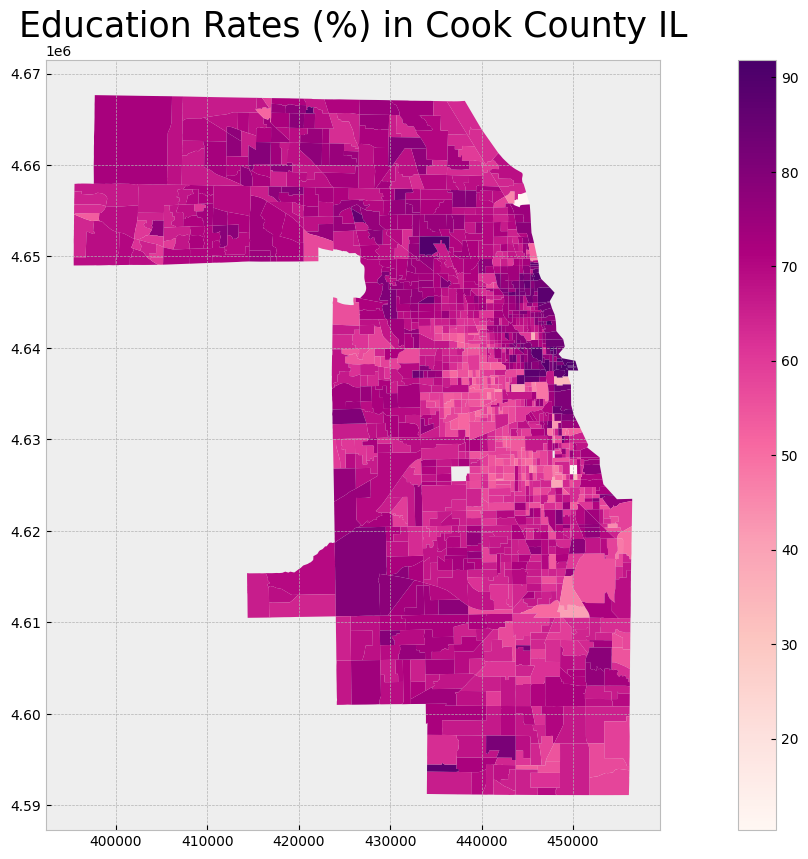

In [50]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
il_education_tract.plot(column = "Education_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Education Rates (%) in Cook County IL', fontdict = {'fontsize': '25', 'fontweight' : '3'})

plt.savefig('../images/education.png')